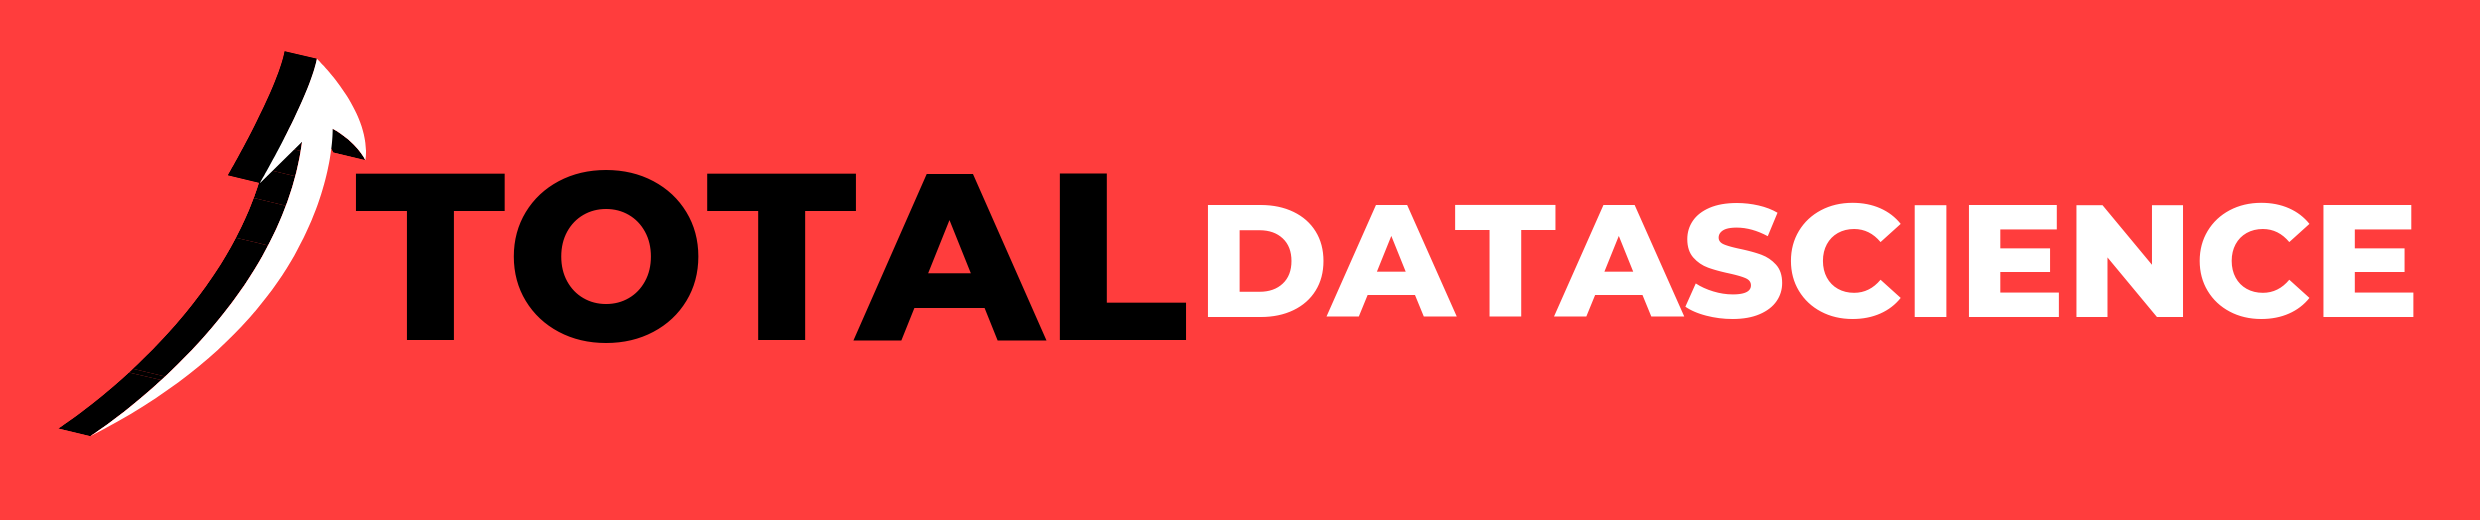

Related Courses: 


1.   [Data Science/MachineLearning Project Deployment Mastery](https://bit.ly/udemy-best-datascience)
2.   [20+ End-To-End Machine Learning Projects & Deployment 2021](https://bit.ly/end-to-end-projects)
3. [Build &Deploy Machine Learning on Flask,AWS,Azure,Heroku,GCP](https://bit.ly/deploymodels)



# **STOCK MARKET CLUSTERING**

In this project we will be extracting live Stock Market data from yahoo finance. We will find similarities amongst various companies using their stock stock market prices and then cluster them into different clusters using the K-means algorithm.

Note that this is an unsuppervised machine learning problem and will use an unsuppervised machine learning technique with the help of the K-means algorithm.

NB: "pandas_datareader" extract data from variouse internet sources into a Dataframe. Curently the following sources are supported


*   Yahoo! Finance
*   Google Finance
*  St. Louis FED (FRED)
* Kenneth French's data library
* World Bank
* Google Analytics



In [2]:
# !pip install pandas_datareader

In [3]:
# !pip install plotly

In [68]:
from pandas_datareader import data 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go

In [237]:
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC'}

In [238]:
data_source = 'yahoo' # Source of data is yahoo finance.
start_date = '2015-04-17'
end_date = '2022-01-17'
df = data.DataReader(list(companies_dict.values()),data_source,start_date,end_date)

**NOTE:**

If you are using Google Colab, you might get an error like  "***RemoteDataError: No data fetched using 'YahooDailyReader'*** ", in such case, try using jupyter notebook or jupyter lab. 


Also, some companies might be out of public by the time you run this code and as such, no data will be fetched for such companies, try to take them out of the "***companies_dict***" or replace with any other company you wish. You can visit https://finance.yahoo.com/ to search for companies.

In [7]:
df.head()

Attributes   Adj Close                                                \
Symbols           AMZN       AAPL        WBA         NOC          BA   
Date                                                                   
2015-04-17  375.559998  28.347626  72.218582  143.378372  131.652817   
2015-04-20  389.510010  28.995253  72.351463  145.643234  134.354507   
2015-04-21  391.179993  28.838463  72.326546  145.464218  134.935364   
2015-04-22  389.799988  29.227030  72.268417  145.097137  133.052063   
2015-04-23  389.989990  29.465631  71.994354  145.768555  131.890427   

Attributes                                                           ...  \
Symbols            LMT        MCD       INTC         IBM        TXN  ...   
Date                                                                 ...   
2015-04-17  162.389618  79.474815  27.052866  114.720116  48.054134  ...   
2015-04-20  164.040054  80.563728  27.269491  118.640022  48.758217  ...   
2015-04-21  163.614899  79.466446  27.019539  117.283379  48.749840  ...   
2015-04-22  164.731842  81.954208  27.244495  118.068748  49.227612  ...   
2015-04-23  164.373459  81.250618  26.952887  121.553185  45.866417  ...   

Attributes     Volume                                               \
Symbols           PEP          KO         JNJ        TM        HMC   
Date                                                                 
2015-04-17  4991600.0  15330300.0  11084200.0  253900.0   957000.0   
2015-04-20  4468600.0  13023700.0   6668500.0  151600.0   515500.0   
2015-04-21  4184300.0  19673100.0   6532700.0  365800.0   908300.0   
2015-04-22  5293600.0  26887200.0   4763900.0  163600.0   960000.0   
2015-04-23  7827700.0  17408800.0   7351500.0  393000.0  1033500.0   

Attributes                                                            
Symbols            XOM        CVX        VLO           F         BAC  
Date                                                                  
2015-04-17  14430100.0  6548700.0  5230600.0  32149000.0  88994300.0  
2015-04-20  11593600.0  7148800.0  5317900.0  15250800.0  53649400.0  
2015-04-21  10100500.0  5674900.0  5381600.0  18509500.0  64033100.0  
2015-04-22   8663600.0  5643100.0  6344500.0  20312100.0  73092800.0  
2015-04-23   9866100.0  6940000.0  5542700.0  28458000.0  50292200.0  

[5 rows x 144 columns]

In [241]:
df.isna().sum()

Attributes  Symbols
Adj Close   AMZN       0
            AAPL       0
            WBA        0
            NOC        0
            BA         0
                      ..
Volume      XOM        0
            CVX        0
            VLO        0
            F          0
            BAC        0
Length: 144, dtype: int64

In [240]:
df['open']

KeyError: 'open'

In [242]:
stock_open = np.array(df['Open']).T # stock_open is numpy array of transpose of df['Open']
stock_close = np.array(df['Close']).T # stock_close is numpy array of transpose of df['Close']

In [243]:
#‘movement’ is the difference of opening and closing prices of a particular day. Positive movement suggests to go long on stock(buy) and negative movement suggests to short the stock(sell).
movements = stock_close - stock_open

In [244]:
stock_close

array([[ 375.55999756,  389.51000977,  391.17999268, ..., 3304.13989258,
        3224.2800293 , 3242.76000977],
       [  31.1875    ,   31.89999962,   31.72750092, ...,  175.52999878,
         172.19000244,  173.07000732],
       [  86.95999908,   87.12000275,   87.08999634, ...,   53.90999985,
          54.18999863,   54.29999924],
       ...,
       [  57.56000137,   57.47000122,   58.33000183, ...,   84.37000275,
          83.36000061,   85.19999695],
       [  15.76000023,   15.90999985,   15.81999969, ...,   24.46999931,
          25.02000046,   25.19000053],
       [  15.56000042,   15.56999969,   15.5       , ...,   48.86000061,
          48.75999832,   47.90999985]])

In [246]:
df.to_csv('data.csv') # for more understanding of the data we save the data into a csv and view in excel spreadsheet

In [247]:
sum_of_movement = sum(stock_close - stock_open)

In [248]:
for i in range(len(companies_dict)):
    print('company:{}, Change:{}'.format(df['High'].columns[i],sum_of_movement[i]))

company:AMZN, Change:-19.976344108581543
company:AAPL, Change:21.151304244995117
company:WBA, Change:-12.451744079589844
company:NOC, Change:6.330208778381348
company:BA, Change:4.380634307861328
company:LMT, Change:4.511920928955078
company:MCD, Change:-17.27332878112793
company:INTC, Change:-2.8731861114501953
company:IBM, Change:-1.8370943069458008
company:TXN, Change:-25.269573211669922
company:MA, Change:13.894110679626465
company:MSFT, Change:-4.040275573730469
company:GE, Change:-20.73706340789795
company:AXP, Change:-19.643689155578613
company:PEP, Change:14.902754783630371
company:KO, Change:16.322575569152832
company:JNJ, Change:-9.288688659667969
company:TM, Change:4.122885704040527
company:HMC, Change:-2.6692495346069336
company:XOM, Change:15.033147811889648
company:CVX, Change:-3.352579116821289
company:VLO, Change:2.39841365814209
company:F, Change:1.5879287719726562
company:BAC, Change:0.1737651824951172


## EDA

In [249]:

def chart(C=str(),x=str(),y=str()):
    """
    A function that enables us plot the individual line charts
    C = the title of the chart which
    x = x-axis plot
    y = y-axis plot
    """

    plt.title('Company:{}'.format(C),fontsize = 20)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 20)
    plt.xlabel('Date',fontsize = 15)
    plt.ylabel('Opening price',fontsize = 15)
    return(plt.plot(df[x][y]))

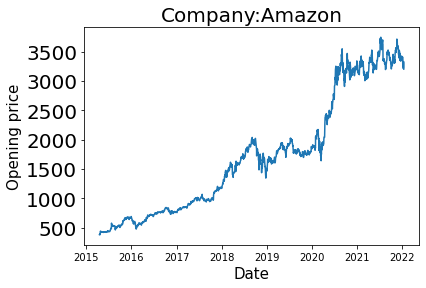

In [252]:
chart('Amazon','Open', 'AMZN')

In [261]:
df2 = pd.DataFrame(df['Open']['AMZN']) #identified the multilevel in the dataset
pd.DataFrame(df2.to_records()) #flattening the multilevel indexing

,Date,AMZN
0,2015-04-17,382.630005
1,2015-04-20,378.549988
2,2015-04-21,391.309998
3,2015-04-22,391.910004
4,2015-04-23,390.209991
...,...,...
1696,2022-01-10,3211.709961
1697,2022-01-11,3230.000000
1698,2022-01-12,3331.500000
1699,2022-01-13,3305.010010


In [264]:
k = list(companies_dict.keys())
v = list(companies_dict.values())

df2 = pd.DataFrame()

for a in v:
    df2[a] = df['Open'][a]
#     print(df2)


df_open = pd.DataFrame(df2.to_records()) # flattens the record by removing multiindexing format
df_open

,Date,AMZN,AAPL,WBA,NOC,BA,LMT,MCD,INTC,IBM,...,PEP,KO,JNJ,TM,HMC,XOM,CVX,VLO,F,BAC
0,2015-04-17,382.630005,31.387501,88.459999,162.199997,150.880005,195.800003,95.129997,32.509998,154.636703,...,95.839996,40.470001,99.370003,138.990005,35.220001,87.139999,109.360001,57.970001,15.880000,15.710000
1,2015-04-20,378.549988,31.392500,87.510002,161.179993,151.059998,195.279999,95.000000,32.610001,154.971313,...,96.260002,40.419998,100.260002,138.740005,35.099998,87.129997,109.570000,57.740002,15.890000,15.620000
2,2015-04-21,391.309998,32.025002,87.279999,163.720001,153.509995,198.050003,96.190002,32.930000,158.766724,...,97.199997,40.669998,100.660004,141.369995,35.509998,87.379997,110.050003,57.470001,15.920000,15.600000
3,2015-04-22,391.910004,31.747499,87.040001,162.369995,152.360001,196.699997,97.000000,32.410000,157.160614,...,97.250000,41.560001,100.629997,141.470001,35.500000,87.040001,110.050003,58.580002,15.830000,15.550000
4,2015-04-23,390.209991,32.075001,86.889999,161.539993,150.830002,197.490005,97.440002,32.040001,157.963669,...,96.669998,41.230000,100.500000,141.160004,35.900002,87.360001,110.000000,59.500000,15.840000,15.720000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,2022-01-10,3211.709961,169.080002,53.930000,405.000000,214.259995,363.000000,266.709991,53.970001,134.470001,...,174.440002,60.549999,173.690002,200.979996,29.750000,68.970001,125.150002,80.989998,24.100000,49.910000
1697,2022-01-11,3230.000000,172.320007,53.980000,397.700012,209.000000,364.010010,263.489990,55.500000,130.520004,...,173.679993,60.430000,172.990005,201.300003,30.139999,68.889999,125.860001,81.800003,23.780001,48.990002
1698,2022-01-12,3331.500000,176.119995,54.529999,401.320007,217.089996,363.380005,263.369995,56.139999,133.250000,...,173.899994,60.529999,169.610001,205.000000,30.500000,71.139999,127.989998,84.720001,24.610001,49.169998
1699,2022-01-13,3305.010010,175.779999,54.189999,395.529999,222.250000,362.059998,261.410004,56.000000,133.899994,...,173.710007,60.540001,169.000000,211.000000,30.790001,71.120003,127.139999,84.370003,24.639999,48.919998


In [232]:
df_open.to_csv('df_flattened.csv', index=False)

<AxesSubplot:xlabel='Date', ylabel='AMZN'>

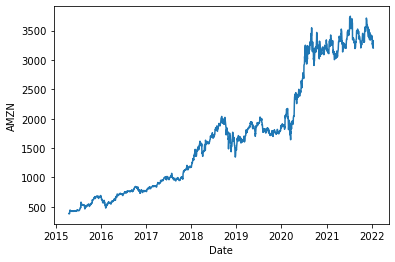

In [187]:
sns.lineplot(data=df_open, x="Date", y="AMZN")

Text(0.5, 1.0, 'Amazon')
Text(0.5, 1.0, 'Apple')
Text(0.5, 1.0, 'Walgreen')
Text(0.5, 1.0, 'Northrop Grumman')
Text(0.5, 1.0, 'Boeing')
Text(0.5, 1.0, 'Lockheed Martin')
Text(0.5, 1.0, 'McDonalds')
Text(0.5, 1.0, 'Intel')
Text(0.5, 1.0, 'IBM')
Text(0.5, 1.0, 'Texas Instruments')
Text(0.5, 1.0, 'MasterCard')
Text(0.5, 1.0, 'Microsoft')
Text(0.5, 1.0, 'General Electrics')
Text(0.5, 1.0, 'American Express')
Text(0.5, 1.0, 'Pepsi')
Text(0.5, 1.0, 'Coca Cola')
Text(0.5, 1.0, 'Johnson & Johnson')
Text(0.5, 1.0, 'Toyota')
Text(0.5, 1.0, 'Honda')
Text(0.5, 1.0, 'Exxon')
Text(0.5, 1.0, 'Chevron')
Text(0.5, 1.0, 'Valero Energy')
Text(0.5, 1.0, 'Ford')
Text(0.5, 1.0, 'Bank of America')


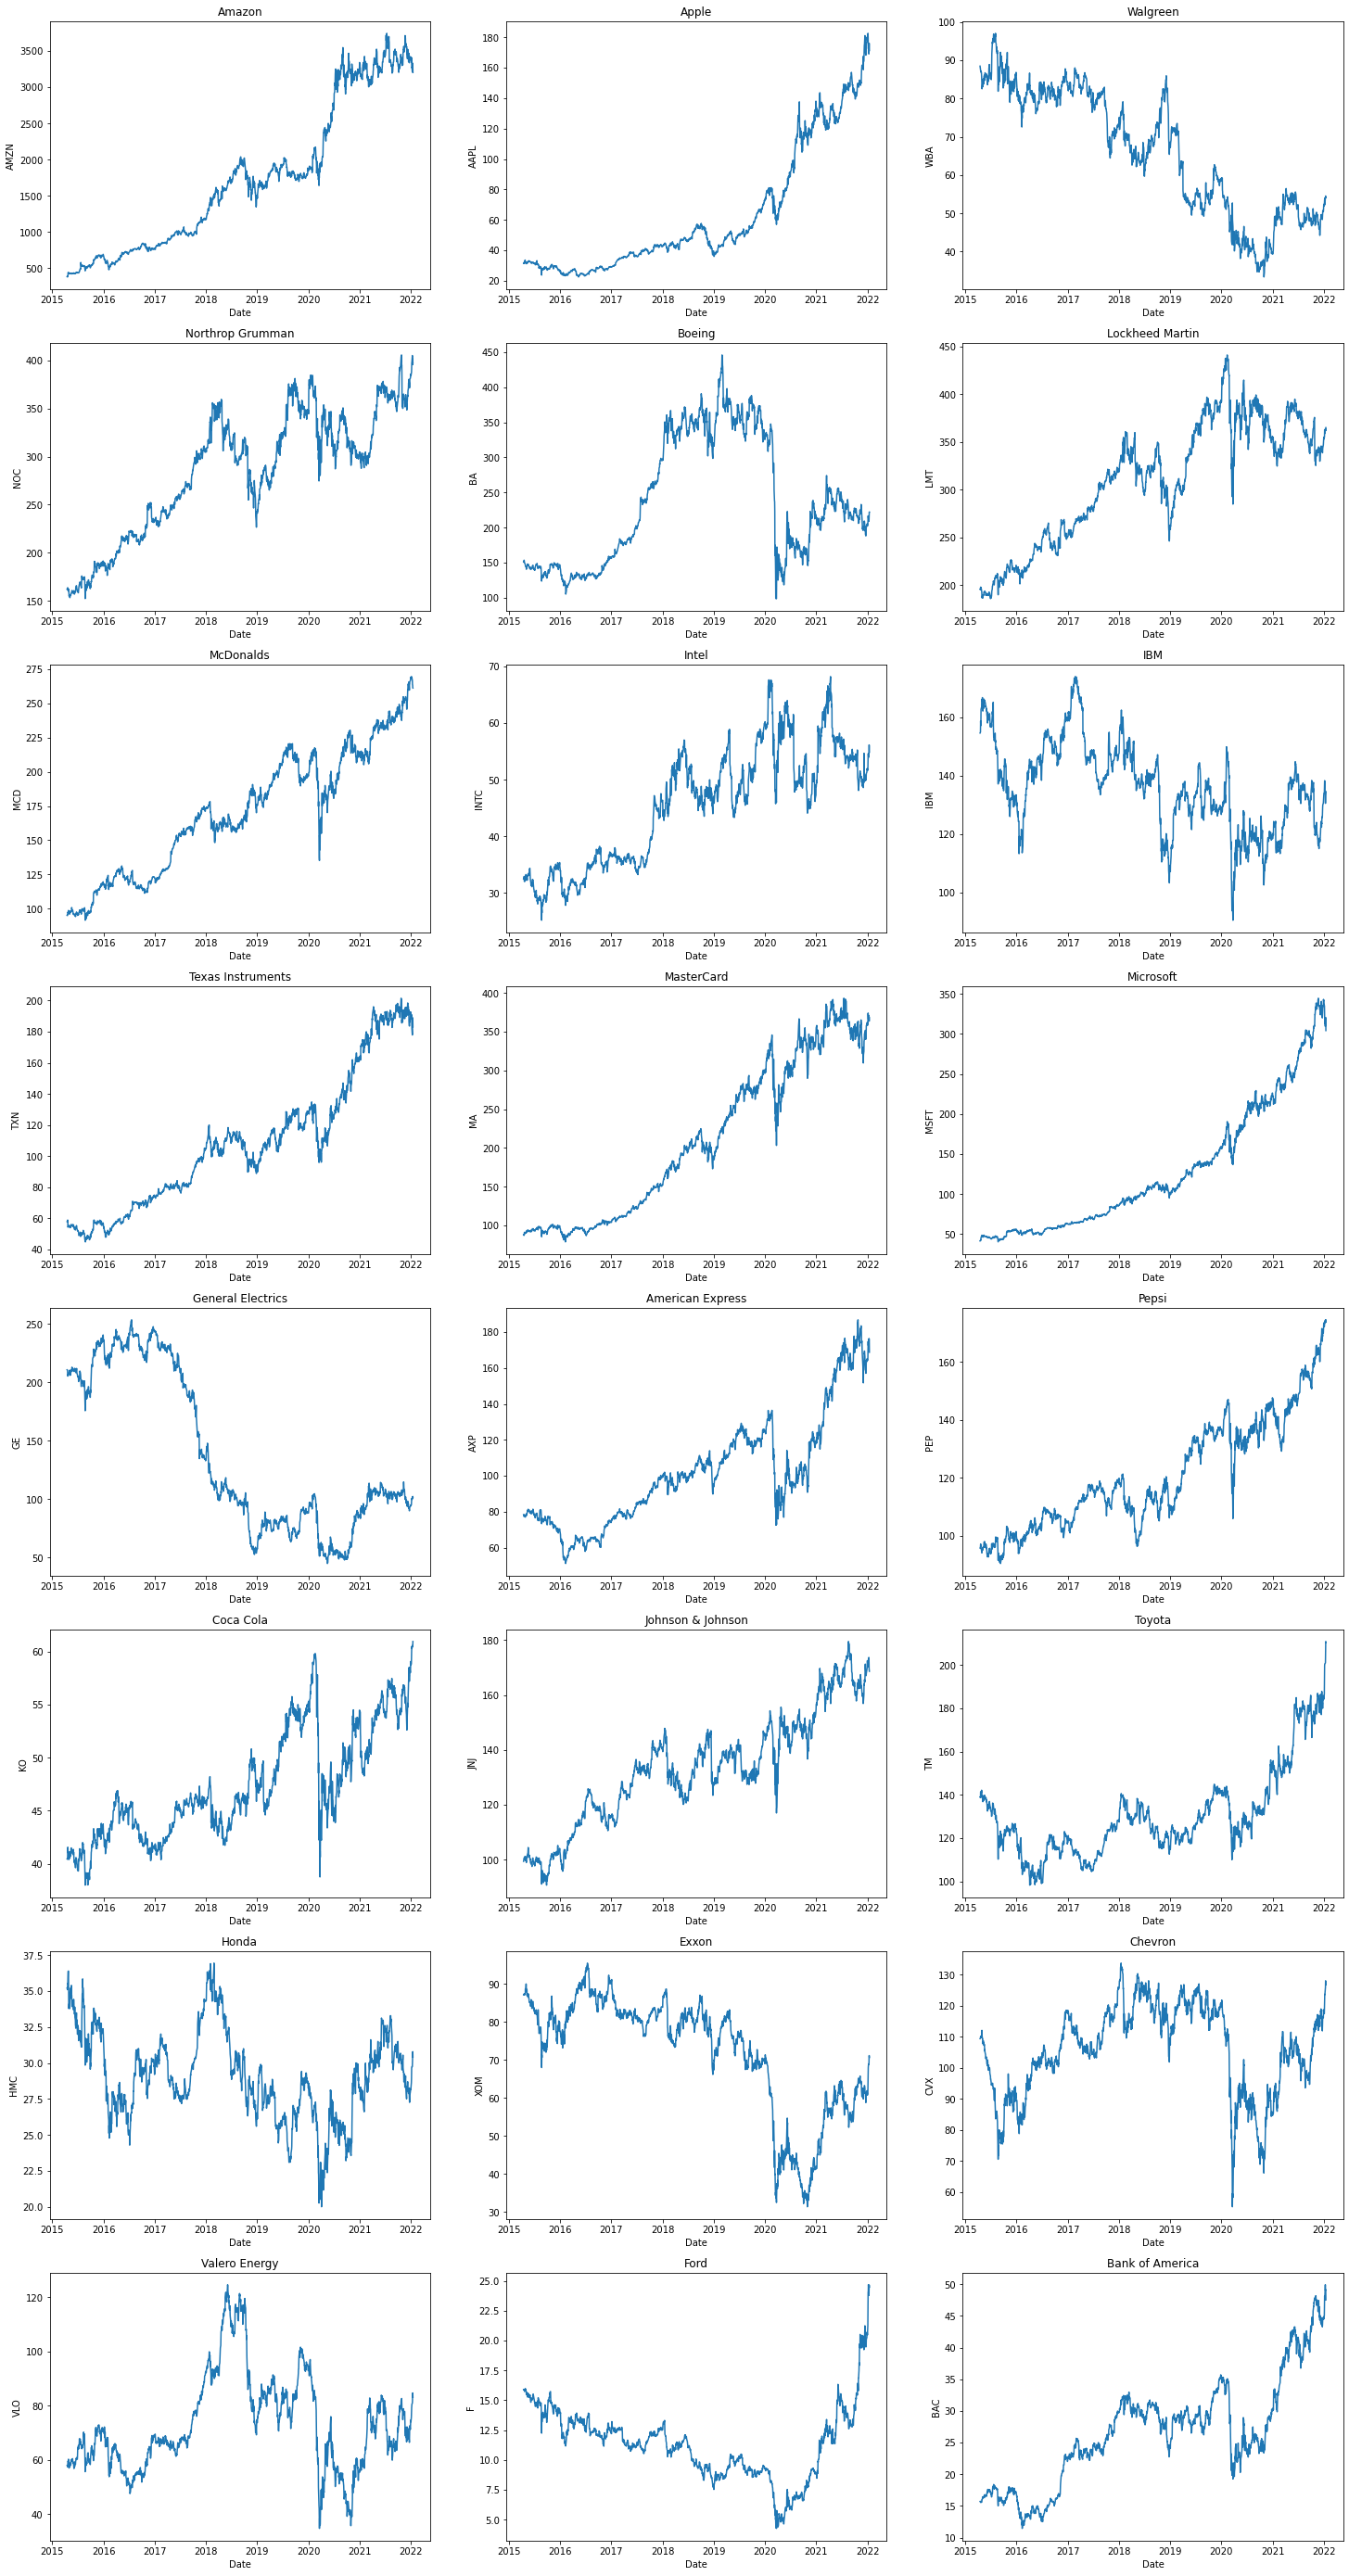

In [265]:
fig, ax2 = plt.subplots(8,3, figsize=(25,50))
i = [0,0,0,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7]
j = [0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,]
k = list(companies_dict.keys())
for (a,b,d,c) in zip(i,j,k,df_open.columns[1:]):
    print(sns.lineplot(data=df_open, x='Date', y=c, ax=ax2[a][b]).set_title(d));

## Focusing on Amazon and Apple

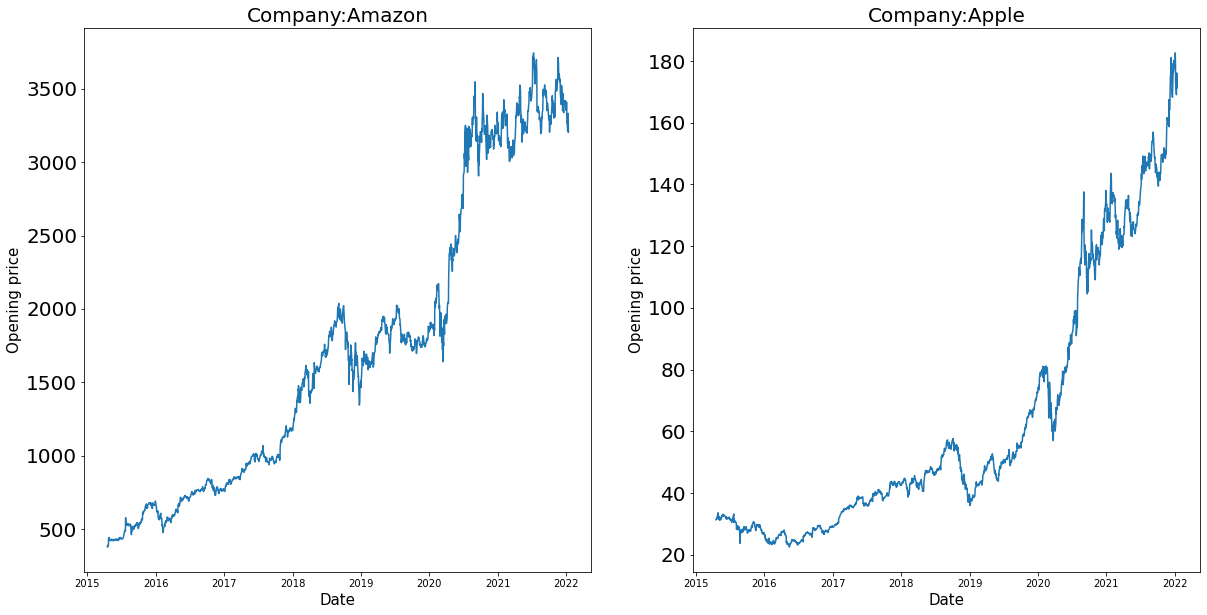

In [270]:
plt.figure(figsize = (20,10)) 
plt.subplot(1,2,1) 

chart('Amazon','Open', 'AMZN')

plt.subplot(1,2,2) 

chart("Apple",'Open', 'AAPL')


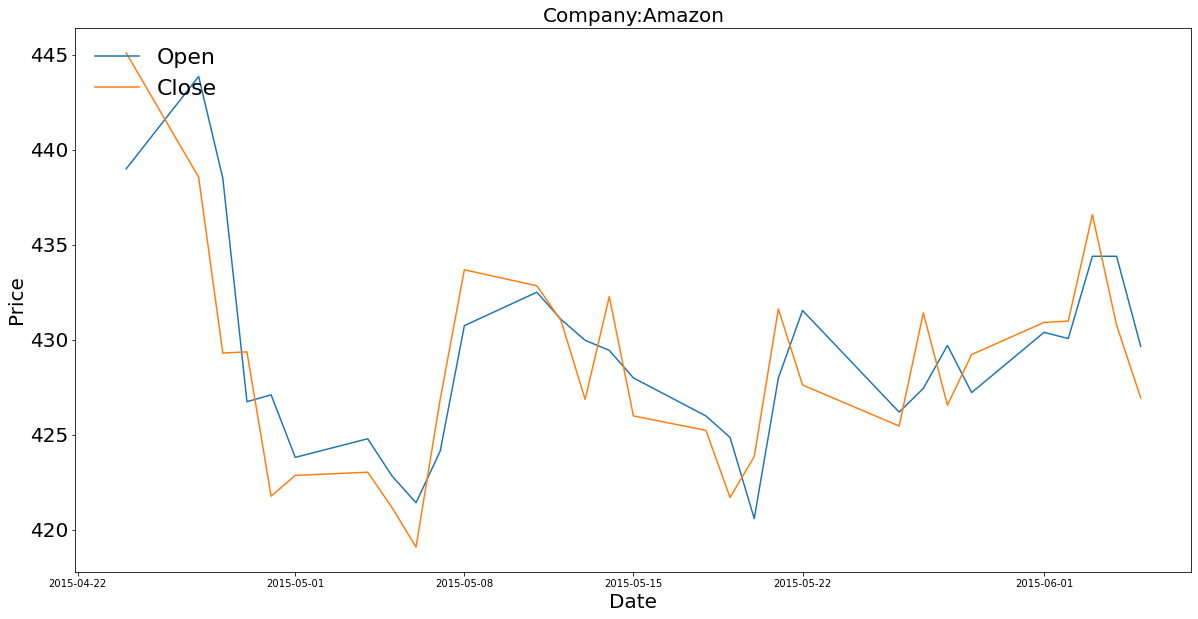

In [ ]:
plt.figure(figsize = (20,10)) # Adjusting figure size
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.plot(df.iloc[0:30]['Open']['AMZN'],label = 'Open') # Opening prices of first 30 days are plotted against date
plt.plot(df.iloc[0:30]['Close']['AMZN'],label = 'Close') # Closing prices of first 30 days are plotted against date
plt.legend(loc='upper left', frameon=False,framealpha=1,prop={'size': 22}) # Properties of legend box

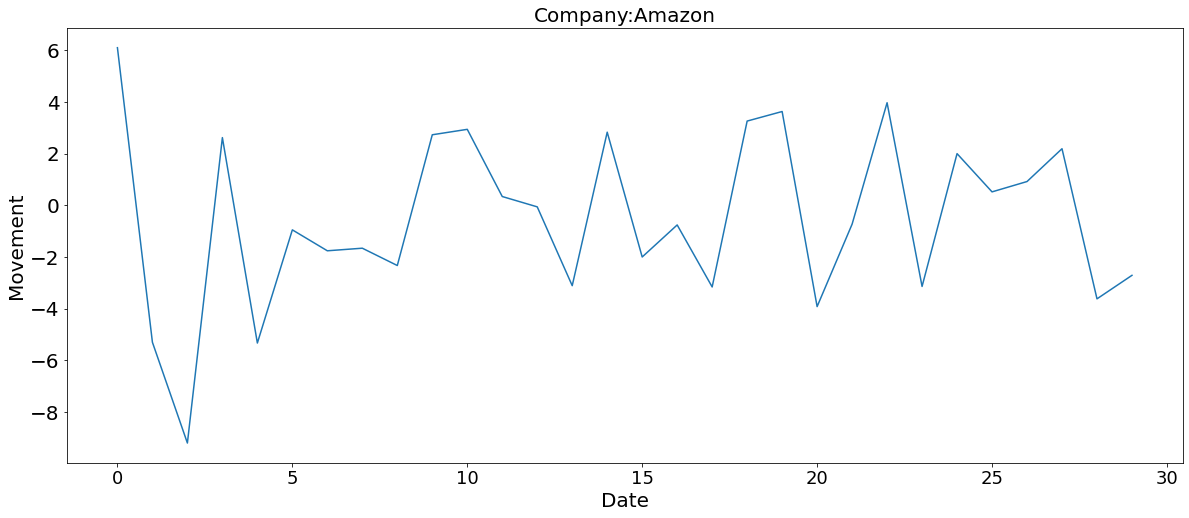

In [ ]:
plt.figure(figsize = (20,8)) 
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0][0:30])

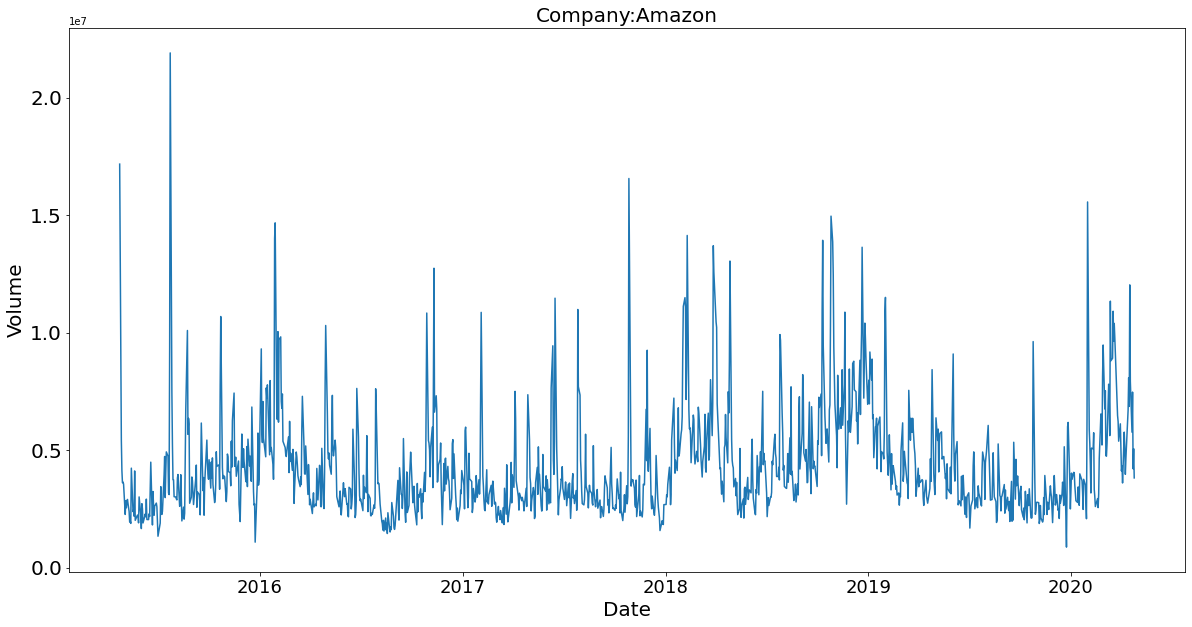

In [ ]:
plt.figure(figsize = (20,10)) 
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Volume',fontsize = 20)
plt.plot(df['Volume']['AMZN'],label = 'Open')

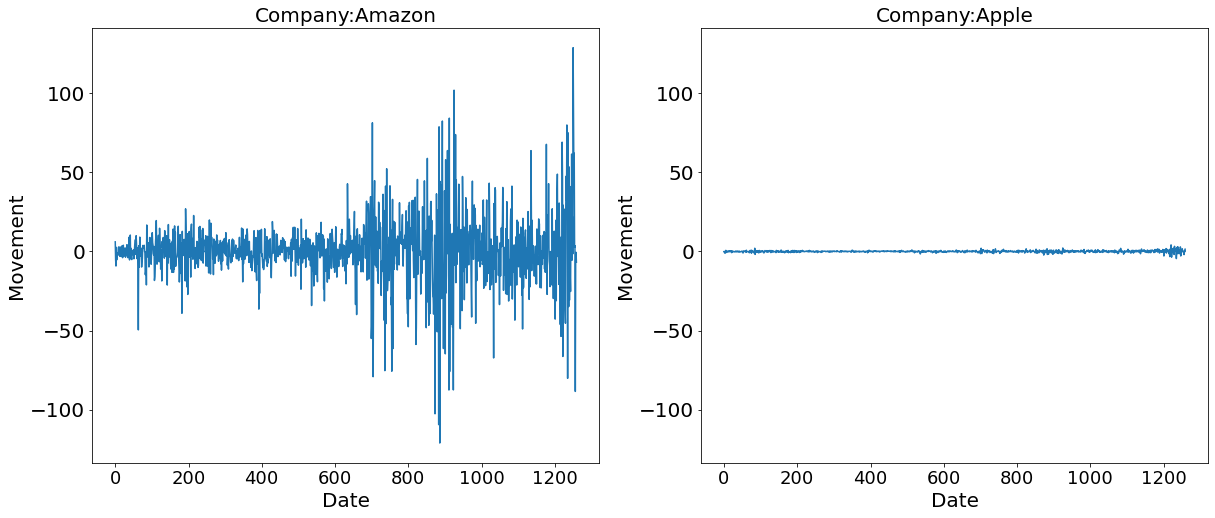

In [ ]:
plt.figure(figsize = (20,8)) 
ax1 = plt.subplot(1,2,1)
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0]) 
plt.subplot(1,2,2,sharey = ax1)
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[1])

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer() # Define a Normalizer
norm_movements = normalizer.fit_transform(movements) # Fit and transform

In [155]:

pd.DataFrame(df2.to_records()) # flattens the record by removing multiindexing format

,index


In [179]:
len(list(df_open.columns[1:]))

24

In [ ]:
print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())

-0.3350859880144041
0.2655260562450729
-3.7305170970841864e-05


In [ ]:
fig, ax2 = plt.subplots(3,4, figsize=(16,16))
i = [0,0,0,1,1,1,2,2,2,3,3,3]
j = [0,1,2,0,1,2,0,1,2,0,1,2]
for (a,b,c) in zip(i,j,df.columns):
    print(sns.distplot(df[c], ax=ax2[a][b]).set_title(c));


#### CREATING A PIPELINE

In [ ]:
# Import the necessary packages
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
# Define a normalizer
normalizer = Normalizer()
# Create Kmeans model
kmeans = KMeans(n_clusters = 10,max_iter = 1000)
# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(movements)
predictions = pipeline.predict(movements)

In [130]:
df.columns

MultiIndex([('Adj Close', 'AMZN'),
            ('Adj Close', 'AAPL'),
            ('Adj Close',  'WBA'),
            ('Adj Close',  'NOC'),
            ('Adj Close',   'BA'),
            ('Adj Close',  'LMT'),
            ('Adj Close',  'MCD'),
            ('Adj Close', 'INTC'),
            ('Adj Close',  'IBM'),
            ('Adj Close',  'TXN'),
            ...
            (   'Volume',  'PEP'),
            (   'Volume',   'KO'),
            (   'Volume',  'JNJ'),
            (   'Volume',   'TM'),
            (   'Volume',  'HMC'),
            (   'Volume',  'XOM'),
            (   'Volume',  'CVX'),
            (   'Volume',  'VLO'),
            (   'Volume',    'F'),
            (   'Volume',  'BAC')],
           names=['Attributes', 'Symbols'], length=144)

In [ ]:
predictions

array([2, 2, 4, 1, 8, 1, 9, 2, 7, 2, 2, 2, 6, 5, 3, 3, 3, 7, 7, 0, 0, 7,
       7, 5], dtype=int32)

In [ ]:
df1 = pd.DataFrame({'labels':labels,'companies':list(companies_dict)}).sort_values(by=['labels'],axis = 0)

C:\Users\Folayan Tobi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMZN'>

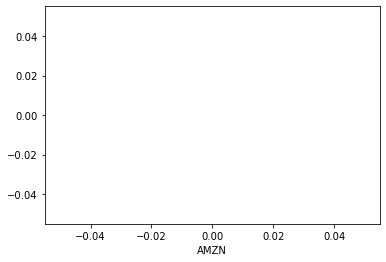

In [75]:
sns.lineplot(df['Open']['AMZN'])

In [ ]:
df1

,labels,companies
16,0,Johnson & Johnson
15,0,Coca Cola
14,0,Pepsi
23,1,Bank of America
18,1,Honda
17,1,Toyota
22,1,Ford
8,1,IBM
13,2,American Express
10,2,MasterCard


### Dimension Reduction-Principal Component Analysis(PCA)

In [ ]:

from sklearn.decomposition import PCA
# Define a normalizer
normalizer = Normalizer()
# Reduce the data
reduced_data = PCA(n_components = 2)
# Create Kmeans model
kmeans = KMeans(n_clusters = 10,max_iter = 1000)
# Make a pipeline chaining normalizer, pca and kmeans
pipeline = make_pipeline(normalizer,reduced_data,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(movements)
# Prediction
predictions = pipeline.predict(movements)
# Create dataframe to store companies and predicted labels
df2 = pd.DataFrame({'labels':labels,'companies':list(companies_dict.keys())}).sort_values(by=['labels'],axis = 0)

In [58]:
len(list(companies_dict.keys()))

24

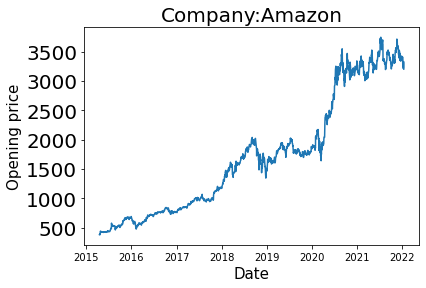

In [38]:
chart('Amazon','Open', 'AZMN')

In [100]:
df['Open']['AMZN']

Date
2015-04-17     382.630005
2015-04-20     378.549988
2015-04-21     391.309998
2015-04-22     391.910004
2015-04-23     390.209991
                 ...     
2022-01-10    3211.709961
2022-01-11    3230.000000
2022-01-12    3331.500000
2022-01-13    3305.010010
2022-01-14    3203.000000
Name: AMZN, Length: 1701, dtype: float64

### Plot the Decision Boundary

<Figure size 432x288 with 0 Axes>

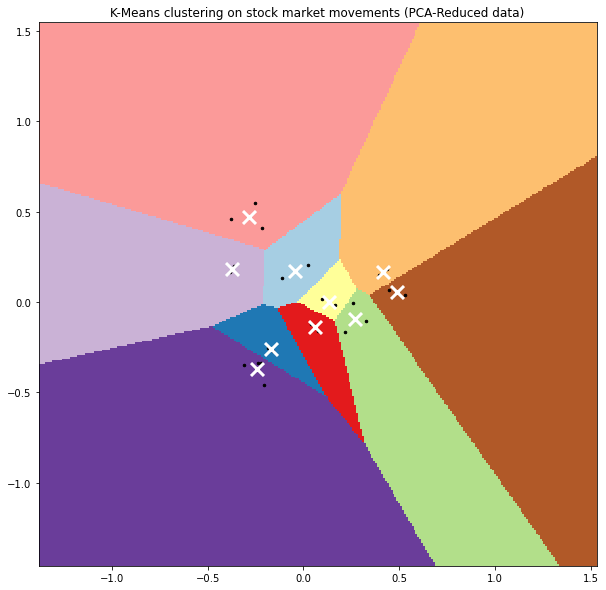

In [ ]:
from sklearn.decomposition import PCA
# Reduce the data
reduced_data = PCA(n_components = 2).fit_transform(norm_movements)
# Define step size of mesh
h = 0.01
# Plot the decision boundary
x_min,x_max = reduced_data[:,0].min()-1, reduced_data[:,0].max() + 1
y_min,y_max = reduced_data[:,1].min()-1, reduced_data[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# Define color plot
cmap = plt.cm.Paired
# Plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto',origin = 'lower')
plt.plot(reduced_data[:,0],reduced_data[:,1],'k.',markersize = 5)
# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 169,linewidths = 3,color = 'w',zorder = 10)
plt.title('K-Means clustering on stock market movements (PCA-Reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()